In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Вычисление констант СЛАУ (апроксимация)
def SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, bc_precision=1):
    
    if bc_precision != 1 and bc_precision != 2:
        return
    
    n = len(x_plot)
    h = x_plot[1] - x_plot[0]
    
    a_plot = []
    b_plot = []
    c_plot = []
    f_plot = []
    
    a0 = 0
    b0 = alpha1 - beta1 / h
    c0 = beta1 / h
    f0 = gamma1

    an = (-1)   * beta2 / h
    bn = alpha2 + beta2 / h
    cn = 0
    fn = gamma2

    if bc_precision == 2:
        if beta1 != 0 and beta2 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * np.power(h, 2) * alpha1 / beta1 + q(x_plot[0]) * np.power(h, 2)
            c0 = 2
            f0 = f(x_plot[0]) * np.power(h, 2) + 2 * gamma1 * h / beta1 - p(x_plot[0]) * np.power(h, 2) * gamma1 / beta1

            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * np.power(h, 2) * alpha2 / beta2 + q(x_plot[n - 1]) * np.power(h, 2)
            fn = f(x_plot[n - 1]) * np.power(h, 2) - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * np.power(h, 2) * gamma2 / beta2)
        
        elif beta1 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * np.power(h, 2) * alpha1 / beta1 + q(x_plot[0]) * np.power(h, 2)
            c0 = 2
            f0 = f(x_plot[0]) * np.power(h, 2) + 2 * gamma1 * h / beta1 - p(x_plot[0]) * np.power(h, 2) * gamma1 / beta1
            
        elif beta2 != 0:
            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * np.power(h, 2) * alpha2 / beta2 + q(x_plot[n - 1]) * np.power(h, 2)
            fn = f(x_plot[n - 1]) * np.power(h, 2) - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * np.power(h, 2) * gamma2 / beta2)

    a_plot.append(a0)
    b_plot.append(b0)
    c_plot.append(c0)
    f_plot.append(f0)

    for k in range(1, n - 1):
        ak =   1  / (h**2) - p(x_plot[k]) / (2 * h)
        bk = (-2) / (h**2) + q(x_plot[k])
        ck =   1  / (h**2) + p(x_plot[k]) / (2 * h)
        fk = f(x_plot[k])

        a_plot.append(ak)
        b_plot.append(bk)
        c_plot.append(ck)
        f_plot.append(fk)

    a_plot.append(an)
    b_plot.append(bn)
    c_plot.append(cn)
    f_plot.append(fn)
    
    return a_plot, b_plot, c_plot, f_plot

In [3]:
# Метод прогонки для решения СЛАУ
def Thomas_algorithm(a_plot, b_plot, c_plot, f_plot):
    n = len(f_plot)
    y_plot = []
        
    A_plot = []
    B_plot = []
    
    A0 = (-1) * c_plot[0] / b_plot[0]
    B0 = f_plot[0] / b_plot[0]
    
    A_plot.append(A0)
    B_plot.append(B0)
    
    for i in range(1, n - 1):
        Ai = (-1) * c_plot[i] / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        A_plot.append(Ai)
    
    for i in range(1, n):
        Bi = (f_plot[i] - a_plot[i] * B_plot[i - 1]) / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        B_plot.append(Bi)
    
    An = 0   
    A_plot.append(An)    
    
    y_plot.append(B_plot[n - 1])
    
    for i in range(n - 2, -1, -1):
        yi = B_plot[i] + A_plot[i] * y_plot[0]
        y_plot.insert(0, yi)
    
    return y_plot

In [4]:
# РЕШАЕМ КРАЕВУЮ ЗАДАЧУ ДЛЯ ОДУ ВТОРОГО ПОРЯДКА

def p(x):
    return np.tan(x)

def q(x):
    return (-1) * 2 * x / np.cos(x)

def f(x):
    return 2 - 2 * np.power(x, 3) / np.cos(x)

# точное решение для анализа
def u(x):
    return np.sin(x) + np.power(x, 2)

def u_der(x):
    return np.cos(x) + 2 * x


alpha1 = 2
alpha2 = 3

beta1 = -1
beta2 = 1

gamma1 = -1
gamma2 = 8.0647

# интервал
left  = 0
right = 1

In [5]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [6]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [7]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

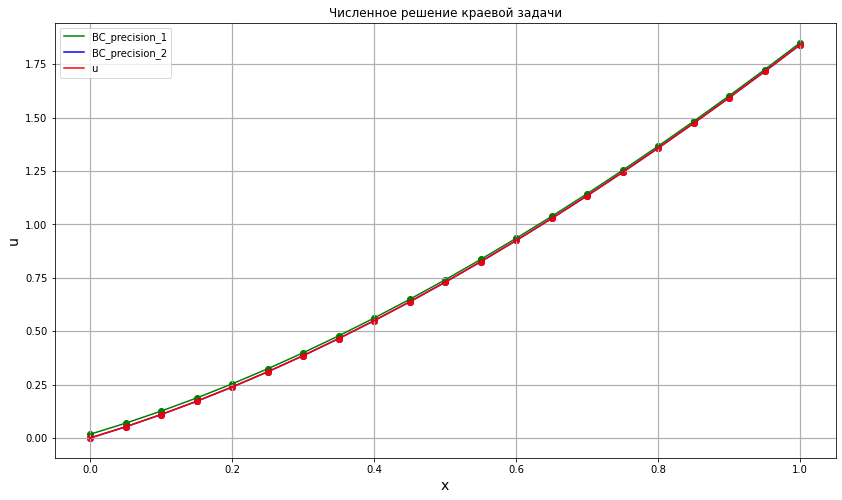

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [9]:
errors_plot1 = [abs(y1 - u) for y1, u in zip(y1_plot, u_plot)]
errors_plot2 = [abs(y2 - u) for y2, u in zip(y2_plot, u_plot)]

d = {'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

print('Step:', h)

df = pd.DataFrame(d)
df.head(20)

Step: 0.05


,errors_plot1,errors_plot2
0,0.017551,0.000127
1,0.016827,0.000119
2,0.016109,0.000111
3,0.015402,0.000103
4,0.014713,0.000095
5,0.014046,0.000087
6,0.013405,0.000079
7,0.012795,0.000071
8,0.012220,0.000064
9,0.011684,0.000056


In [10]:
alpha1 = 2
beta1 = 0

gamma1 = 0

In [11]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [12]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [13]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

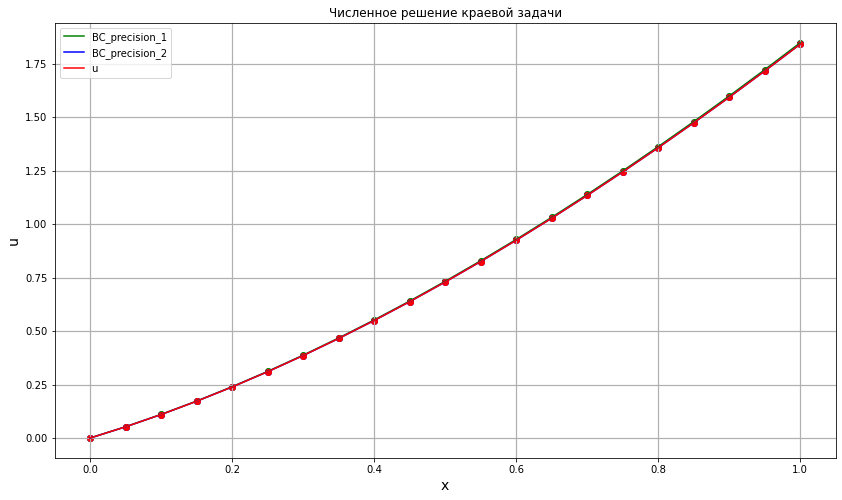

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [15]:
errors_plot1 = [abs(y1 - u) for y1, u in zip(y1_plot, u_plot)]
errors_plot2 = [abs(y2 - u) for y2, u in zip(y2_plot, u_plot)]

d = {'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

print('Step:', h)

df = pd.DataFrame(d)
df.head(20)

Step: 0.05


,errors_plot1,errors_plot2
0,0.000000,0.000000e+00
1,0.000337,3.888713e-07
2,0.000673,8.028620e-07
3,0.001007,1.267041e-06
4,0.001340,1.806210e-06
5,0.001671,2.444710e-06
6,0.002000,3.206261e-06
7,0.002328,4.113830e-06
8,0.002653,5.189526e-06
9,0.002978,6.454539e-06


In [16]:
alpha1 = 0
beta1 = -1

gamma1 = -1

In [17]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [18]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [19]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

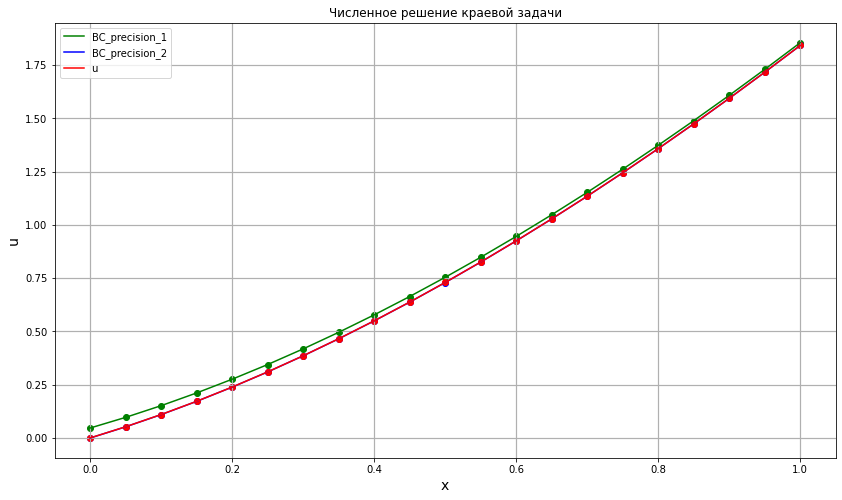

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [21]:
errors_plot1 = [abs(y1 - u) for y1, u in zip(y1_plot, u_plot)]
errors_plot2 = [abs(y2 - u) for y2, u in zip(y2_plot, u_plot)]

d = {'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

print('Step:', h)

df = pd.DataFrame(d)
df.head(20)

Step: 0.05


,errors_plot1,errors_plot2
0,0.046590,0.000337
1,0.044111,0.000316
2,0.041649,0.000295
3,0.039220,0.000274
4,0.036839,0.000254
5,0.034520,0.000234
6,0.032275,0.000215
7,0.030114,0.000196
8,0.028049,0.000177
9,0.026087,0.000160


In [22]:
alpha1 = 2
alpha2 = 3

beta1 = -1
beta2 = 0

gamma1 = -1
gamma2 = 3 * u(1)

In [23]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [24]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [25]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

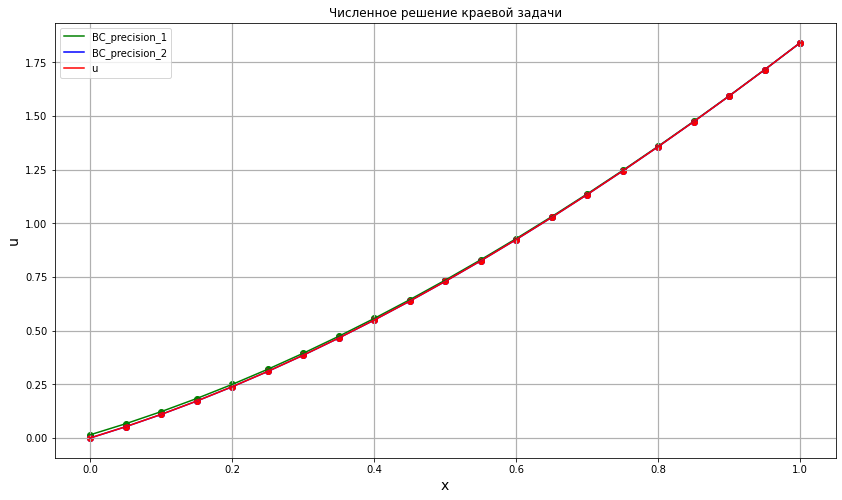

In [26]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [27]:
errors_plot1 = [abs(y1 - u) for y1, u in zip(y1_plot, u_plot)]
errors_plot2 = [abs(y2 - u) for y2, u in zip(y2_plot, u_plot)]

d = {'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

print('Step:', h)

df = pd.DataFrame(d)
df.head(20)

Step: 0.05


,errors_plot1,errors_plot2
0,0.014851,0.000134
1,0.013857,0.000126
2,0.012869,0.000119
3,0.011893,0.000111
4,0.010933,0.000104
5,0.009993,0.000097
6,0.009079,0.000090
7,0.008193,0.000083
8,0.007338,0.000076
9,0.006517,0.000069


In [28]:
alpha1 = 2
alpha2 = 0

beta1 = -1
beta2 = 1

gamma1 = -1
gamma2 = u_der(1)

In [29]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [30]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [31]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

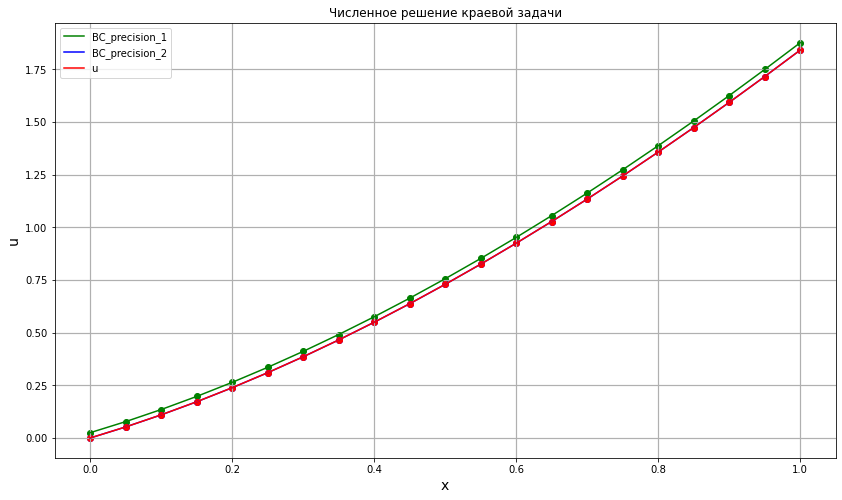

In [32]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [33]:
errors_plot1 = [abs(y1 - u) for y1, u in zip(y1_plot, u_plot)]
errors_plot2 = [abs(y2 - u) for y2, u in zip(y2_plot, u_plot)]

d = {'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

print('Step:', h)

df = pd.DataFrame(d)
df.head(20)

Step: 0.05


,errors_plot1,errors_plot2
0,0.025157,0.000105
1,0.025194,0.000095
2,0.025236,0.000085
3,0.025292,0.000075
4,0.025366,0.000064
5,0.025465,0.000054
6,0.025595,0.000044
7,0.025764,0.000034
8,0.025977,0.000025
9,0.026242,0.000015
